In [1]:
from util import *
import matplotlib.pyplot as plt
import seaborn as ses

In [2]:
mall_id = "m_7168"
train_all = load_train()
train_all = train_all[train_all.mall_id==mall_id]
preprocess_basic_time(train_all)
test = load_testA()
test = test[test.mall_id == mall_id]
shop = load_shop_info()
shop = shop[shop.mall_id == mall_id]
_train_index, _valid_index = get_last_one_week_index(train_all)
train = train_all.iloc[_train_index]
valid = train_all.iloc[_valid_index]


/usr/lib64/python2.7/site-packages/pandas/core/indexing.py:296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/lib64/python2.7/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
util.py:750: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

In [8]:
print "train all", "user shape", train_all.user_id.shape, "unique shape", train_all.user_id.unique().shape
print "train", "user shape", train.user_id.shape, "unique shape", train.user_id.unique().shape
print "valid", "user shape", valid.user_id.shape, "unique shape", valid.user_id.unique().shape
print "test", "user shape", test.user_id.shape, "unique shape", test.user_id.unique().shape
print "train union test user unique shape", np.union1d(train.user_id.unique(),test.user_id.unique()).shape
print "train intersect test user unique shape", np.intersect1d(train.user_id.unique(),test.user_id.unique()).shape
print "shop num, ", shop.shape[0]

train all user shape (26355,) unique shape (15777,)
train user shape (19826,) unique shape (12237,)
valid user shape (6529,) unique shape (4458,)
test user shape (11737,) unique shape (7721,)
train union test user unique shape (18694,)
train intersect test user unique shape (1264,)
shop num,  (99, 6)


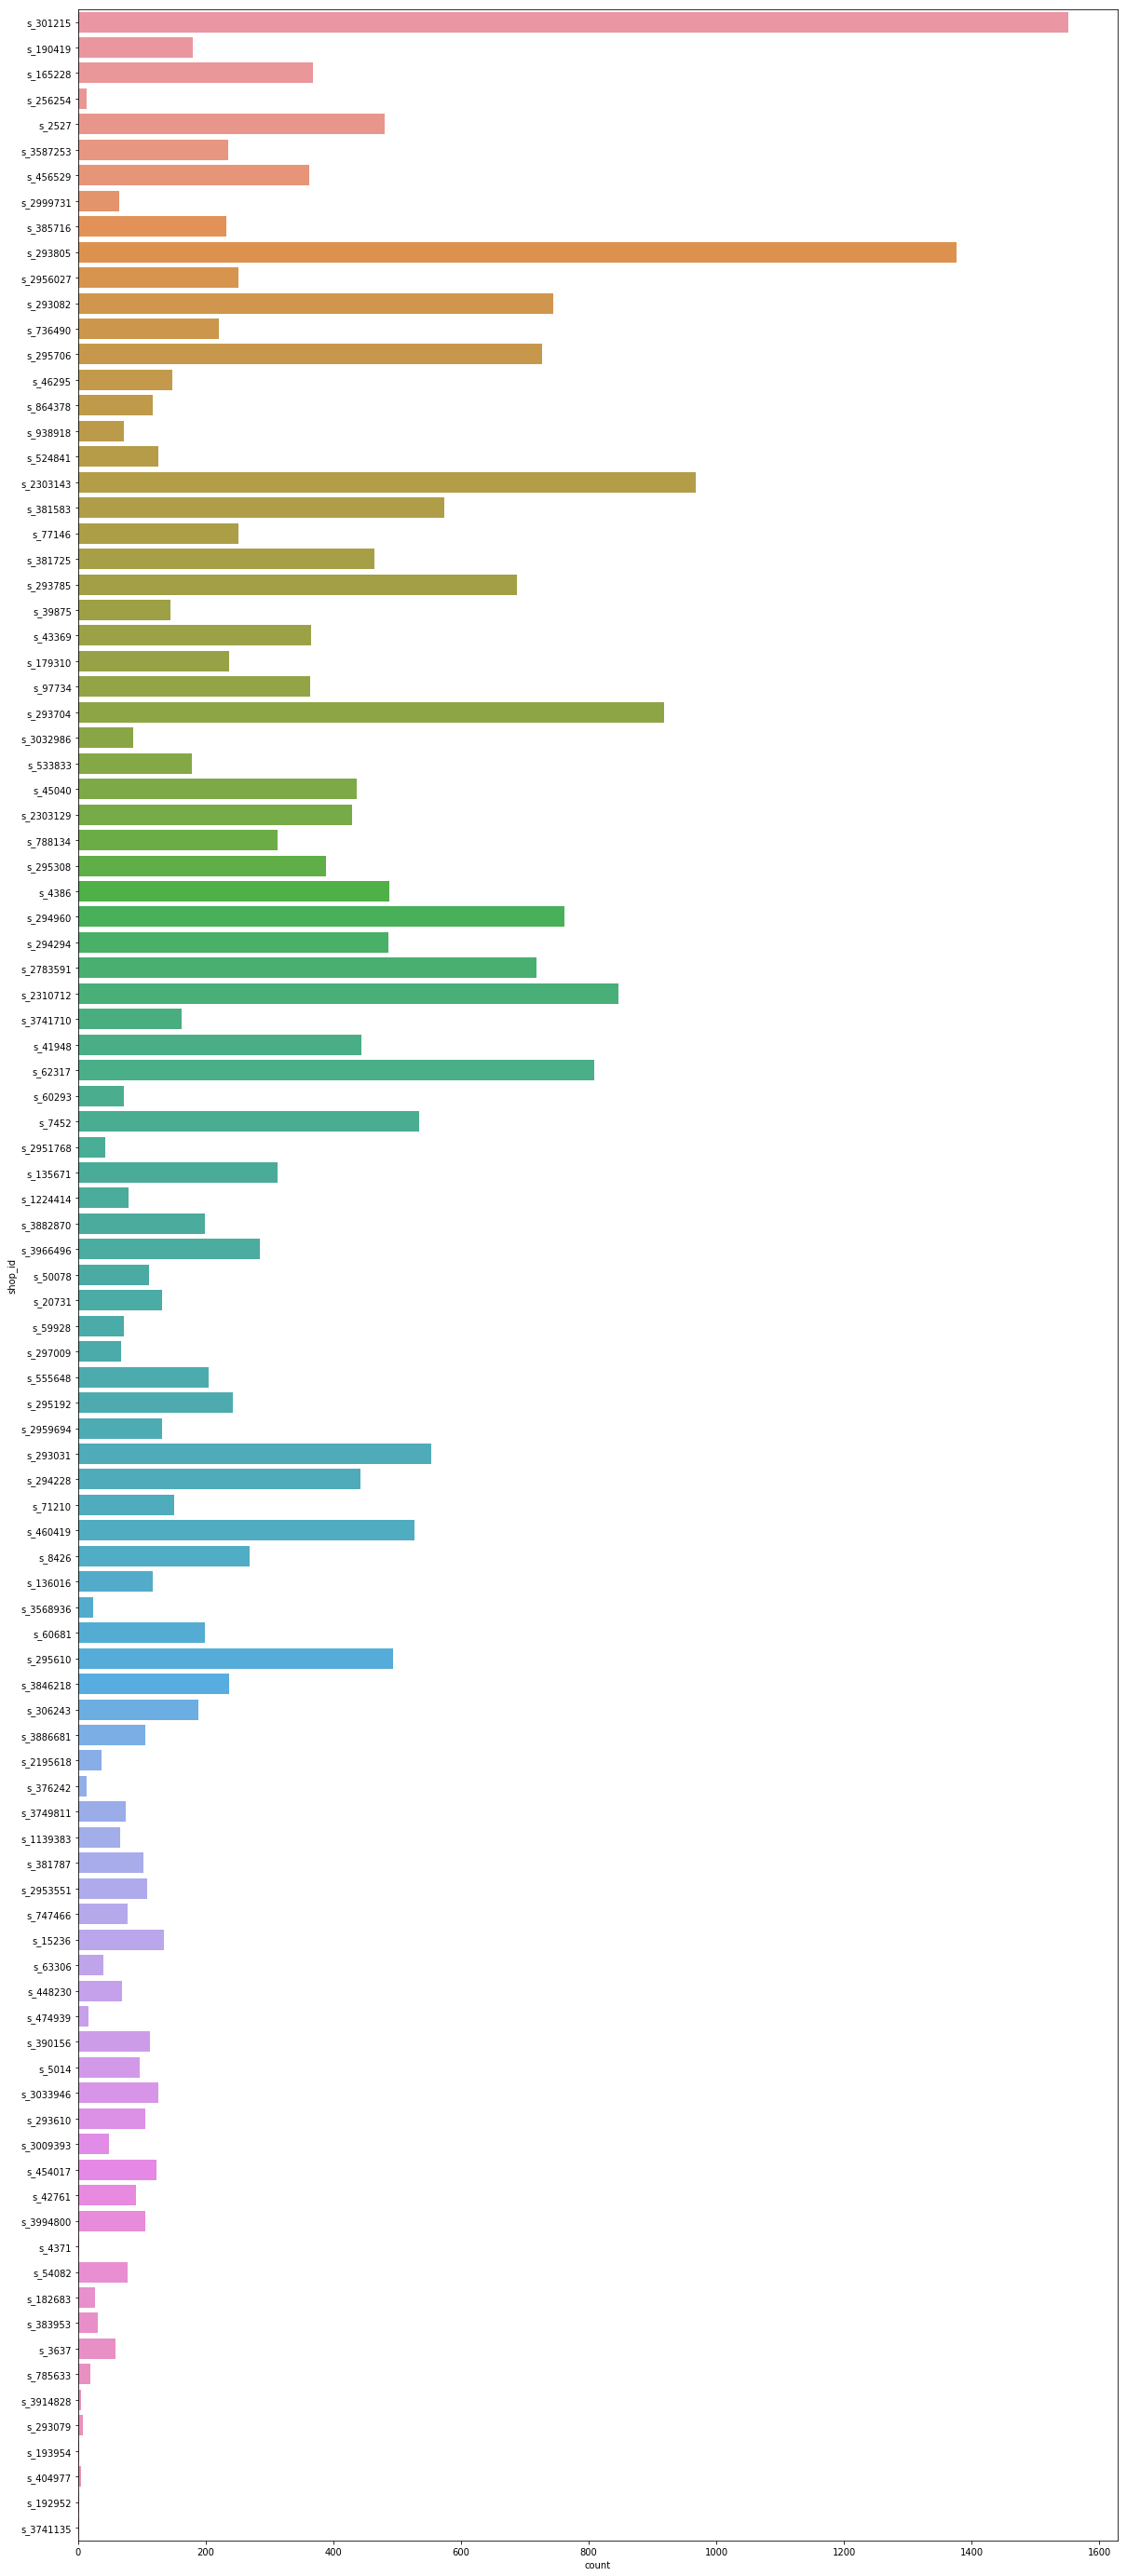

In [9]:
f,ax = plt.subplots(1,1,figsize=(20,50))
ses.countplot(y="shop_id",data=train_all,ax=ax)
plt.show()

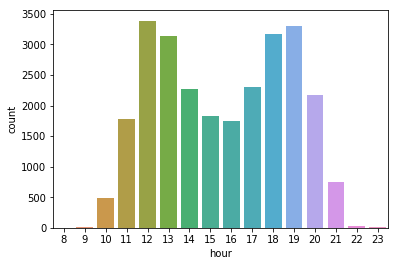

In [16]:
ses.countplot(x="hour",data=train_all)
plt.show()

In [5]:
# predict
predict = pd.read_csv("../result/offline_predict/m_7168.csv")
error = predict[predict.predict != predict.real]
correct = predict[predict.predict == predict.real]

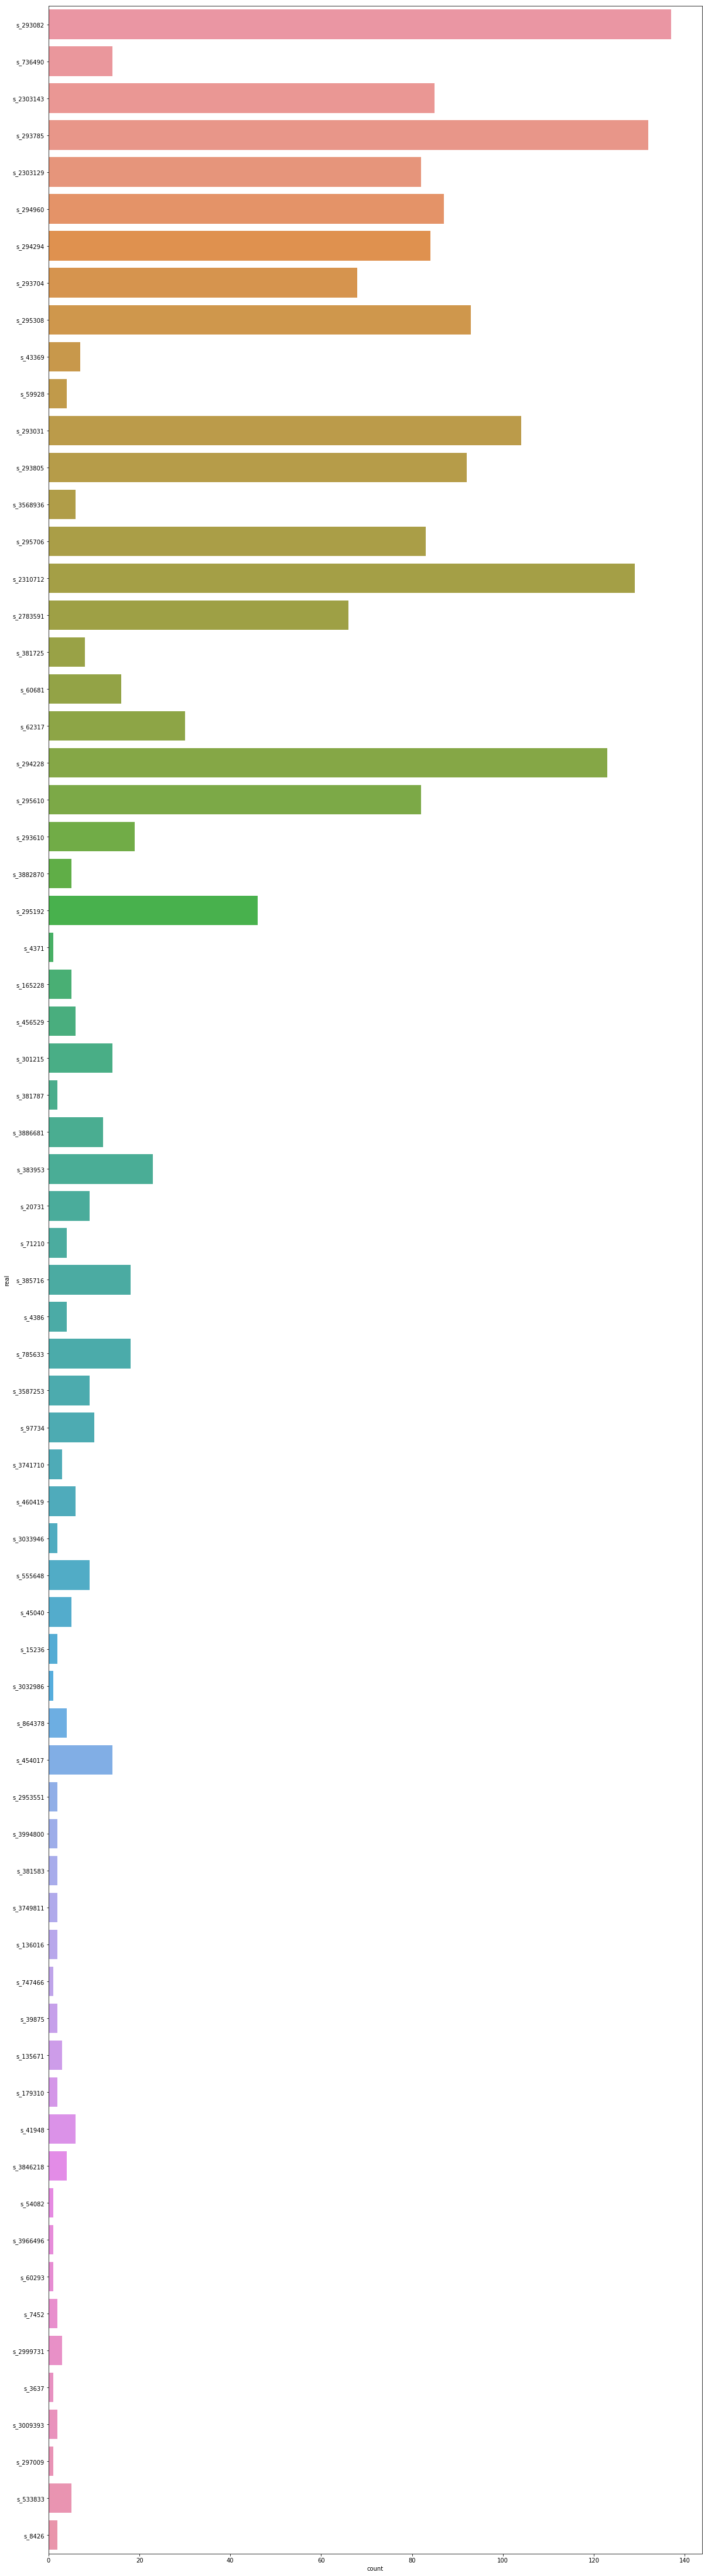

In [6]:
# 错误的商店count
_,ax = plt.subplots(1,1,figsize=(20,80))
ses.countplot(y = "real",data=error)
plt.show()

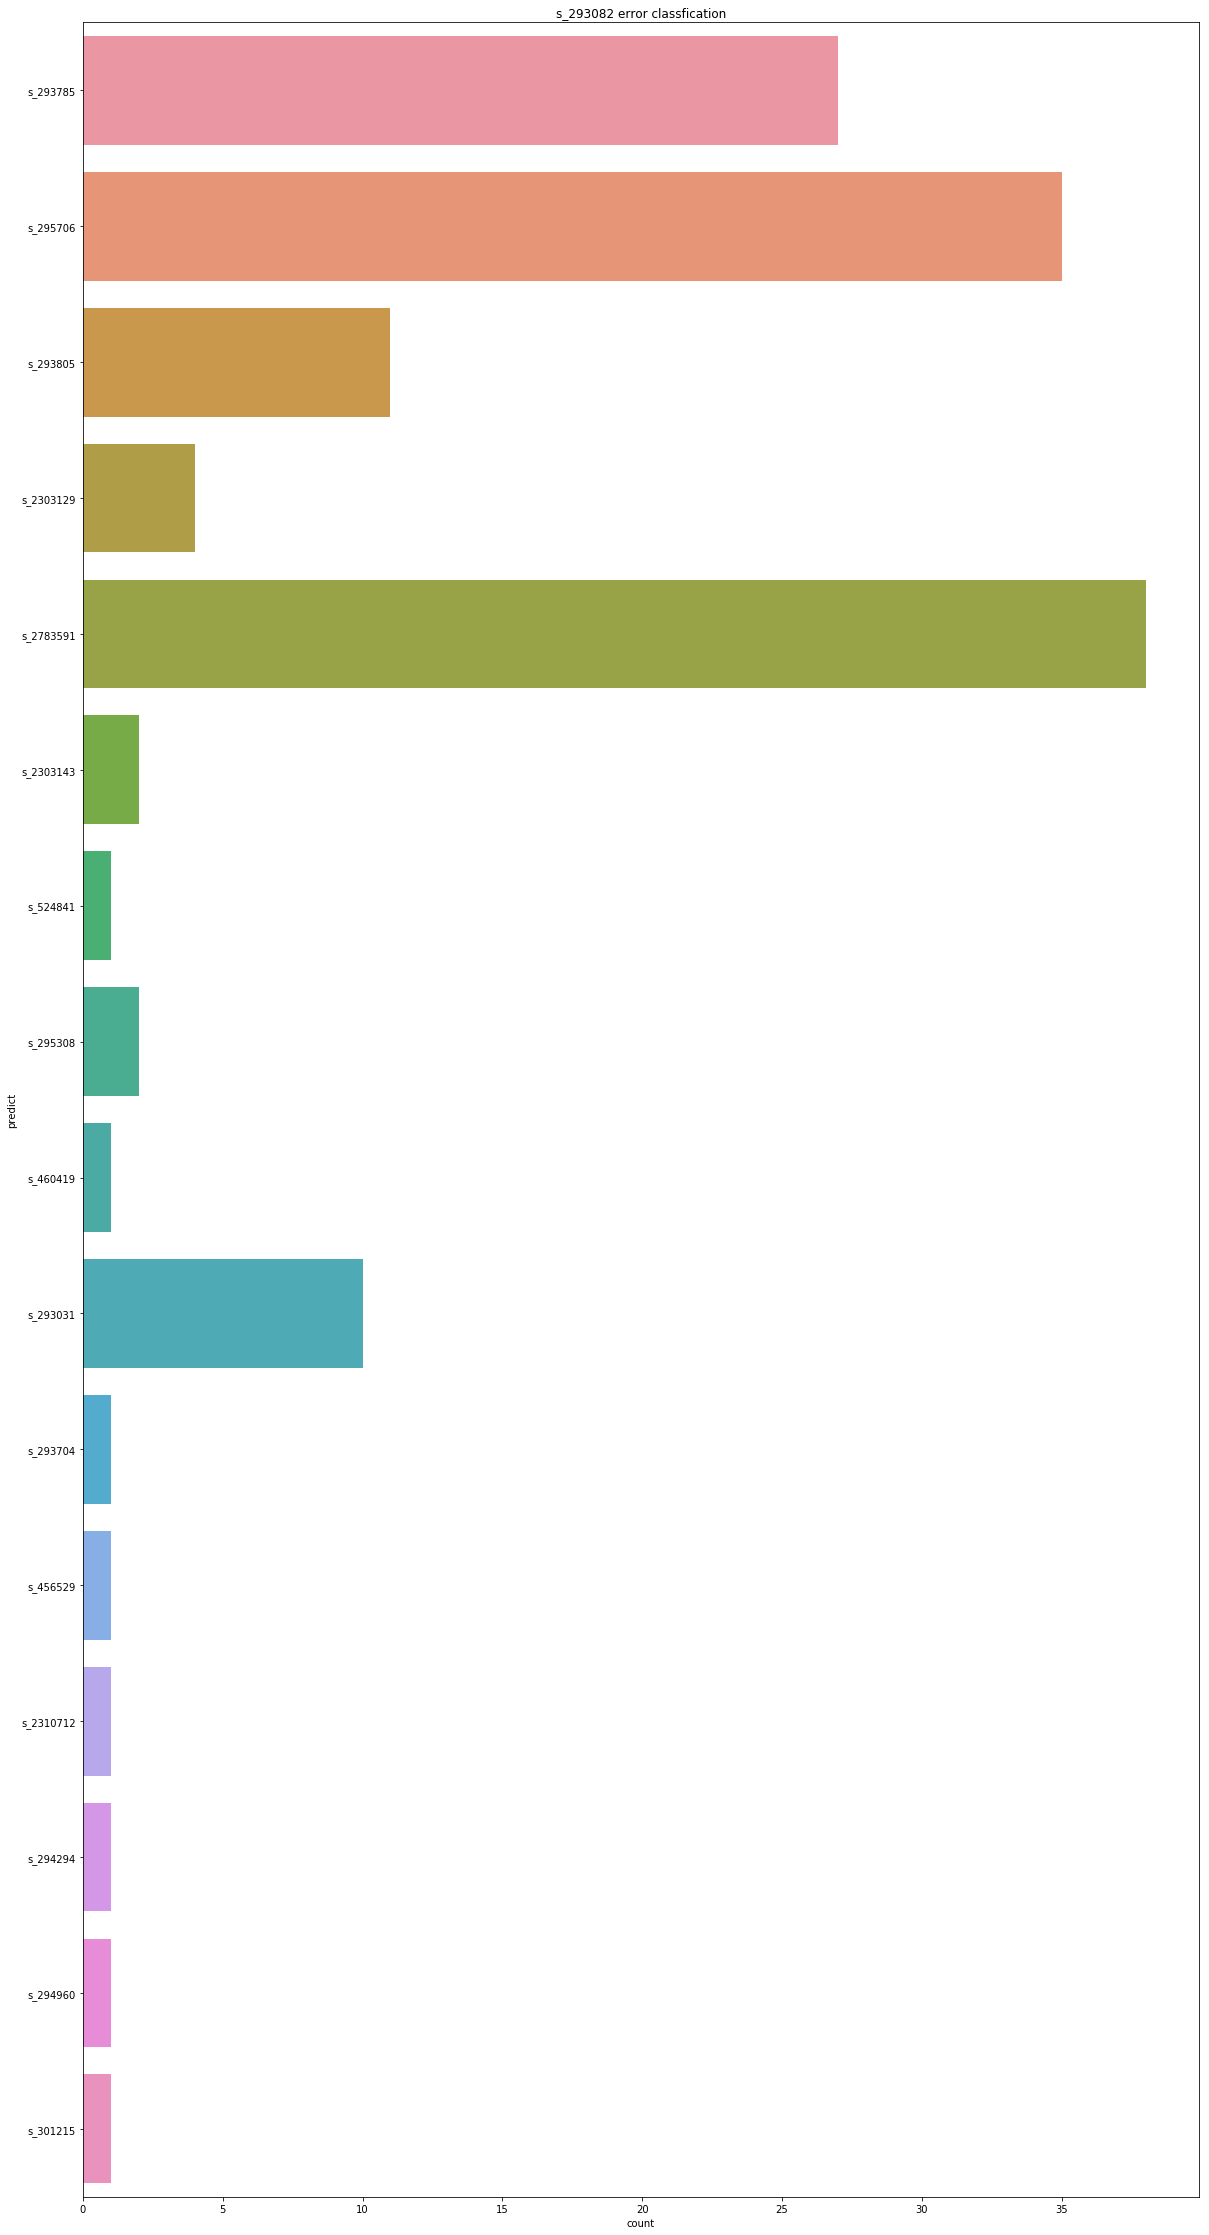

In [7]:
# s_293082 通畅被误分类为了
s_id = "s_293082"
_,ax = plt.subplots(1,1,figsize=(20,40))
ses.countplot(y = "predict",data=error[error.real==s_id],ax=ax)
plt.title(s_id + " error classfication")
plt.show()
# 很大程度被误分类为 s_293805, s_295706, s_2783591, s_293785, s_293031

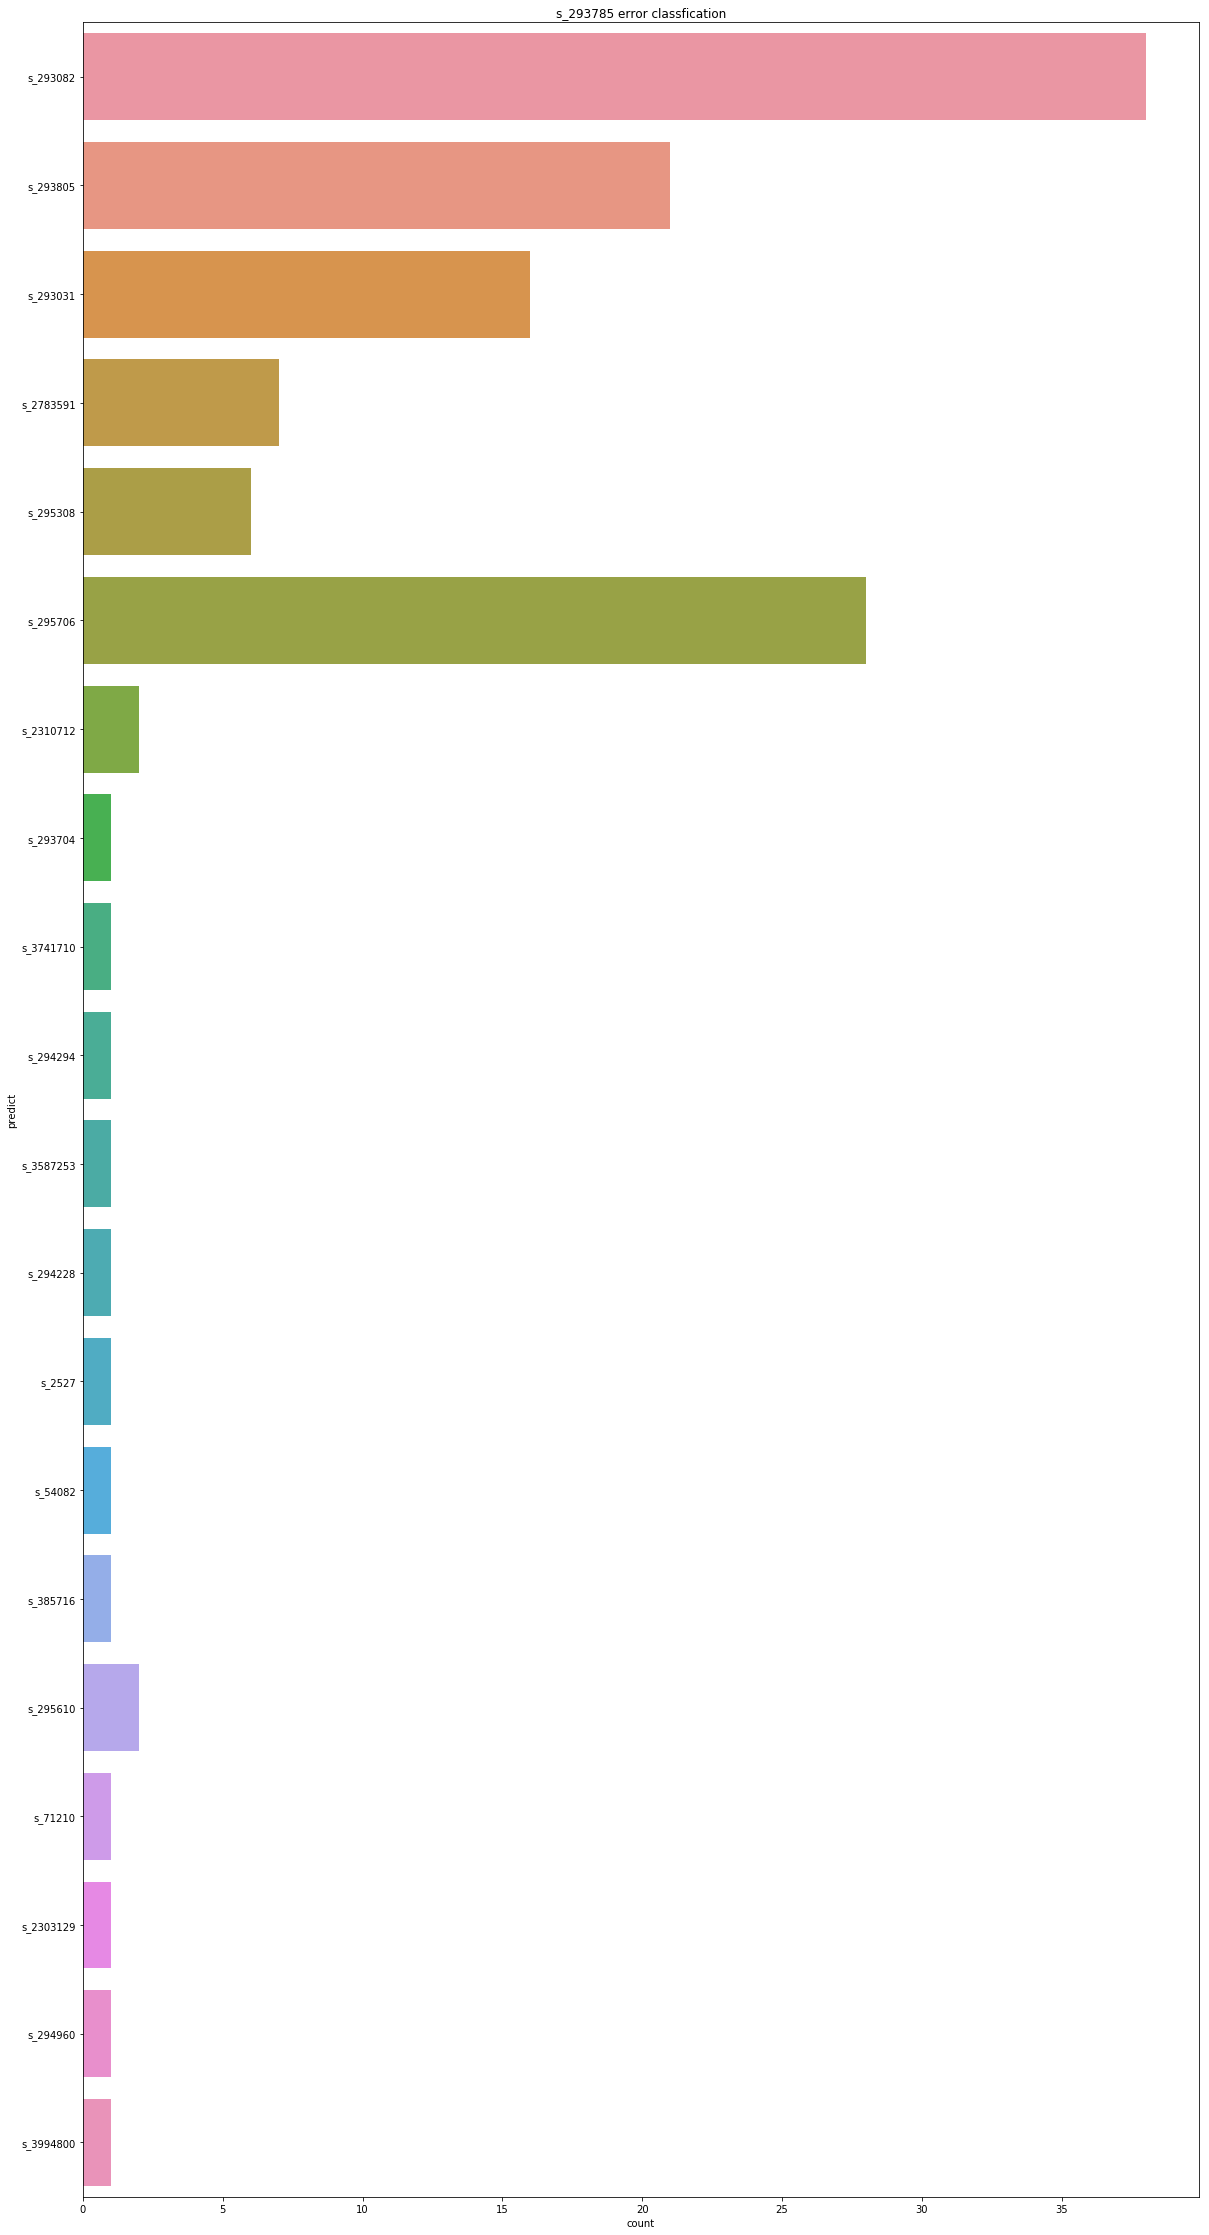

In [8]:
# s_293785 通畅被误分类为了
s_id = "s_293785"
_,ax = plt.subplots(1,1,figsize=(20,40))
ses.countplot(y = "predict",data=error[error.real==s_id],ax=ax)
plt.title(s_id + " error classfication")
plt.show()
# 很大程度被误分类为 s_293802, s_293805, s_295706, s_293031, s_2783591, s_295308

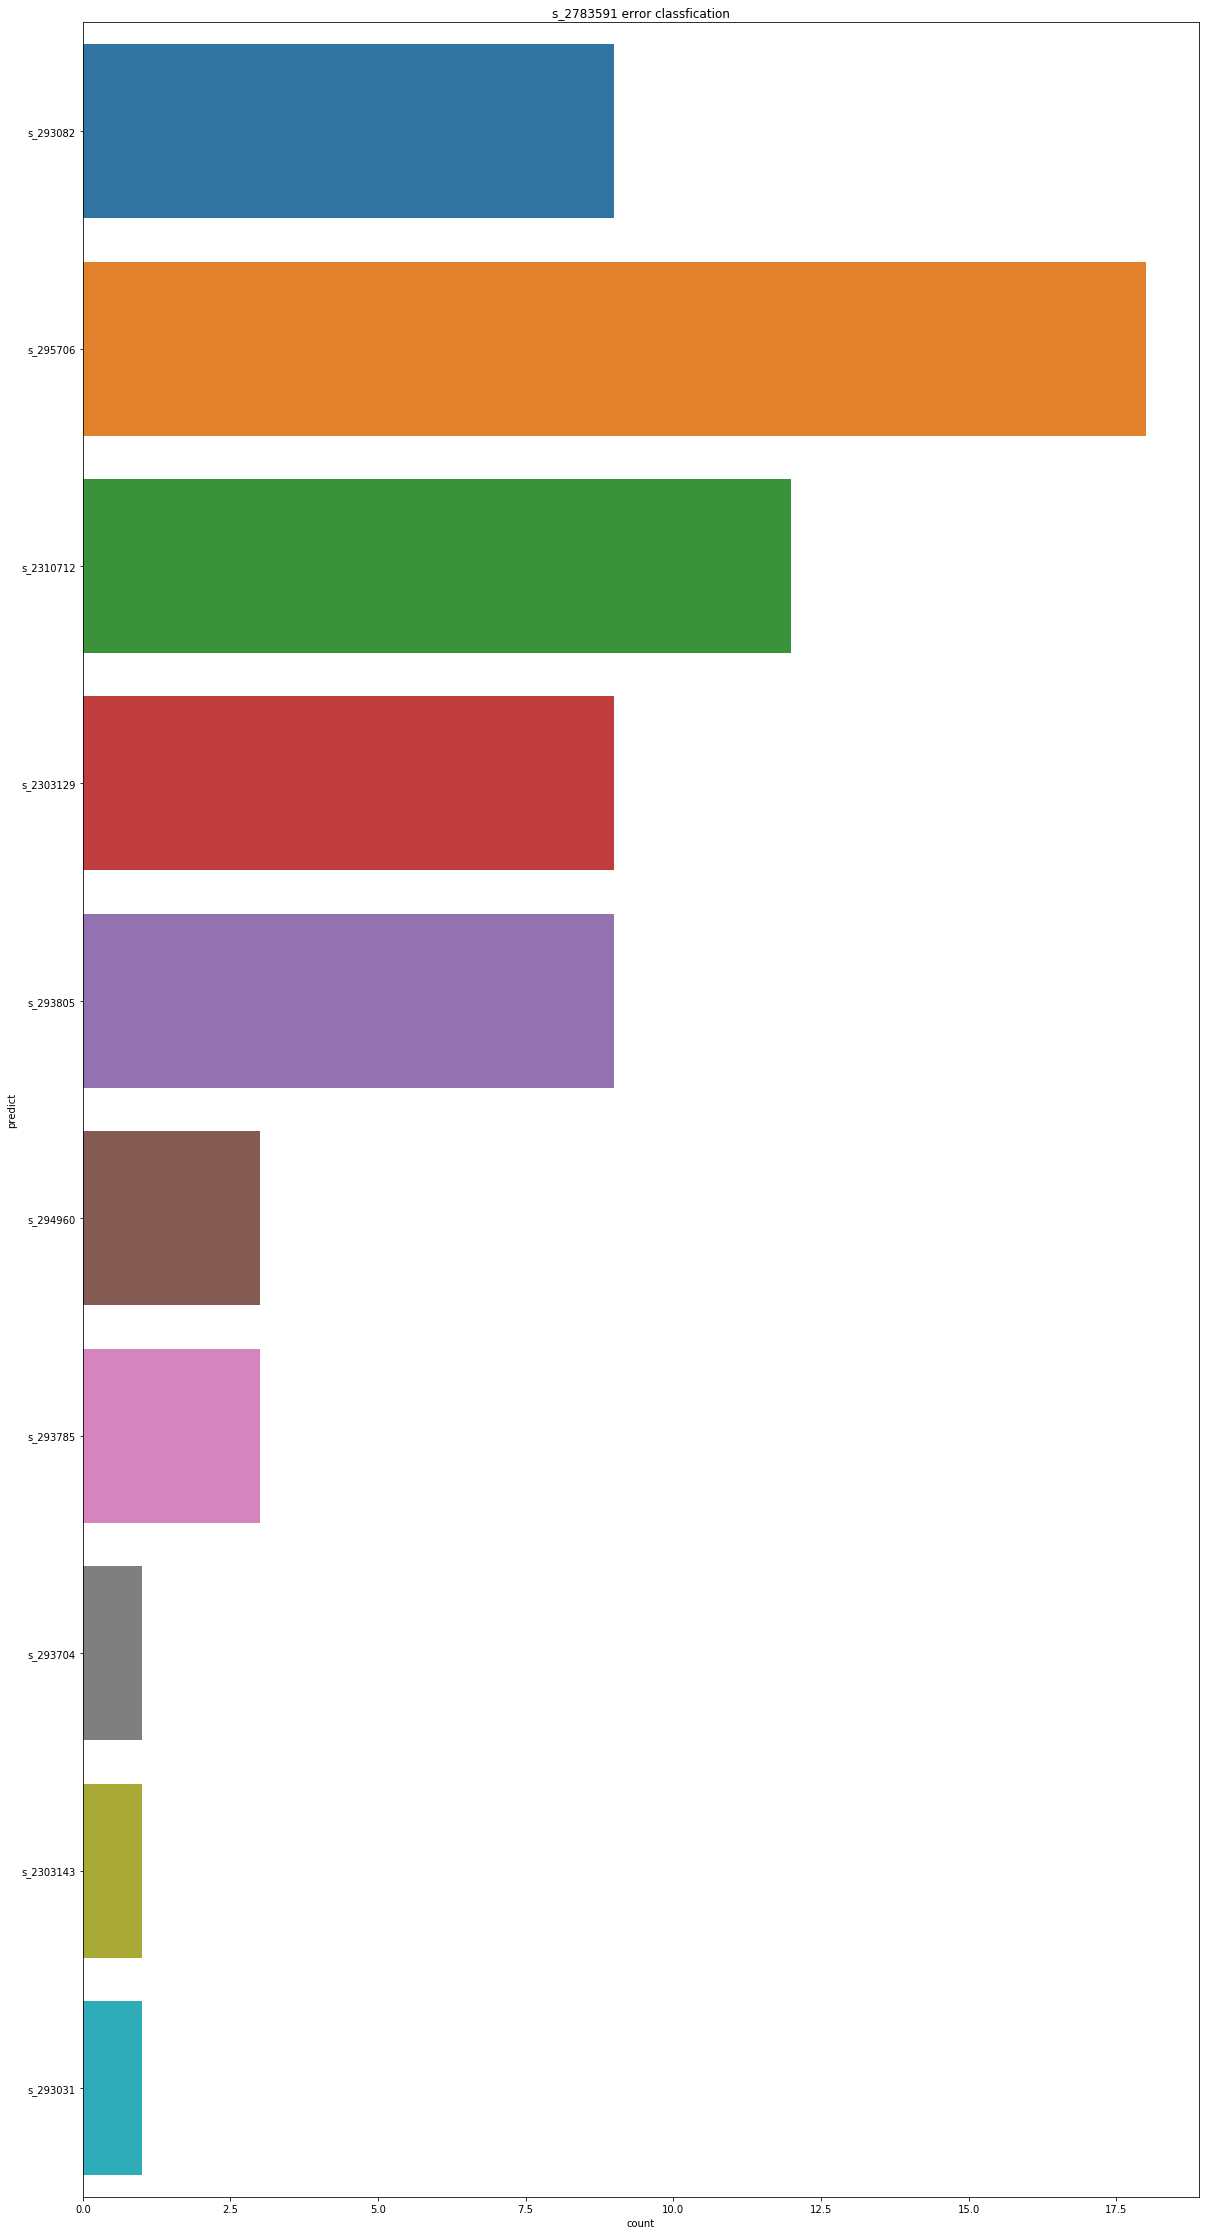

In [13]:
# s_2783591 通畅被误分类为了
s_id = "s_2783591"
_,ax = plt.subplots(1,1,figsize=(20,40))
ses.countplot(y = "predict",data=error[error.real==s_id],ax=ax)
plt.title(s_id + " error classfication")
plt.show()
# 很大程度被误分类为 s_293082, s_2310712, s_2303129, s_293805, s_295706

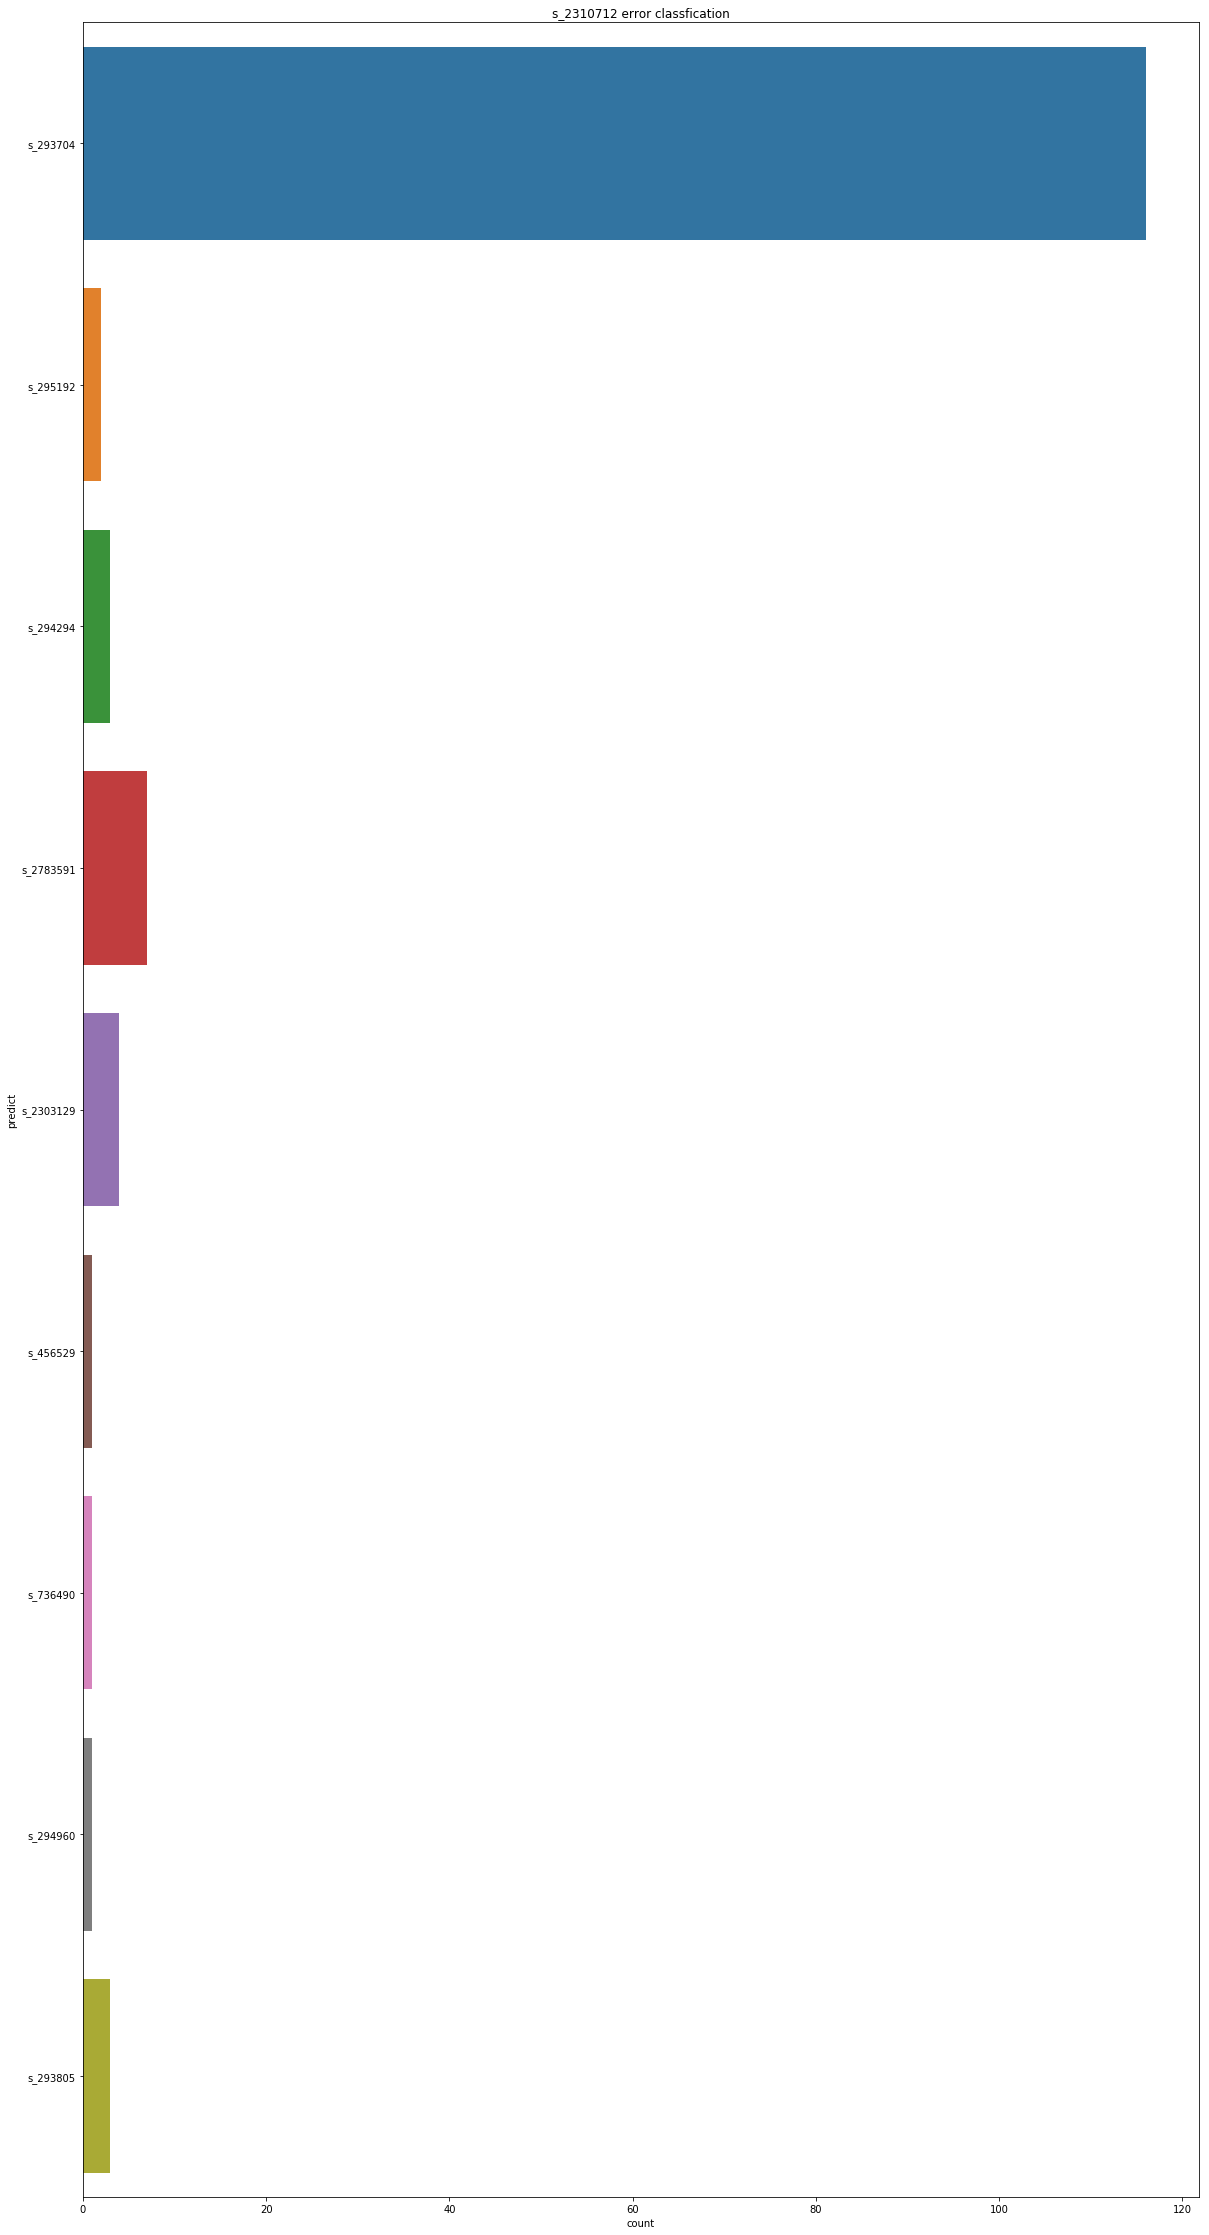

In [7]:
# s_2310712 通畅被误分类为了
s_id = "s_2310712"
_,ax = plt.subplots(1,1,figsize=(20,40))
ses.countplot(y = "predict",data=error[error.real==s_id],ax=ax)
plt.title(s_id + " error classfication")
plt.show()
# 很大程度被误分类为 s_293704

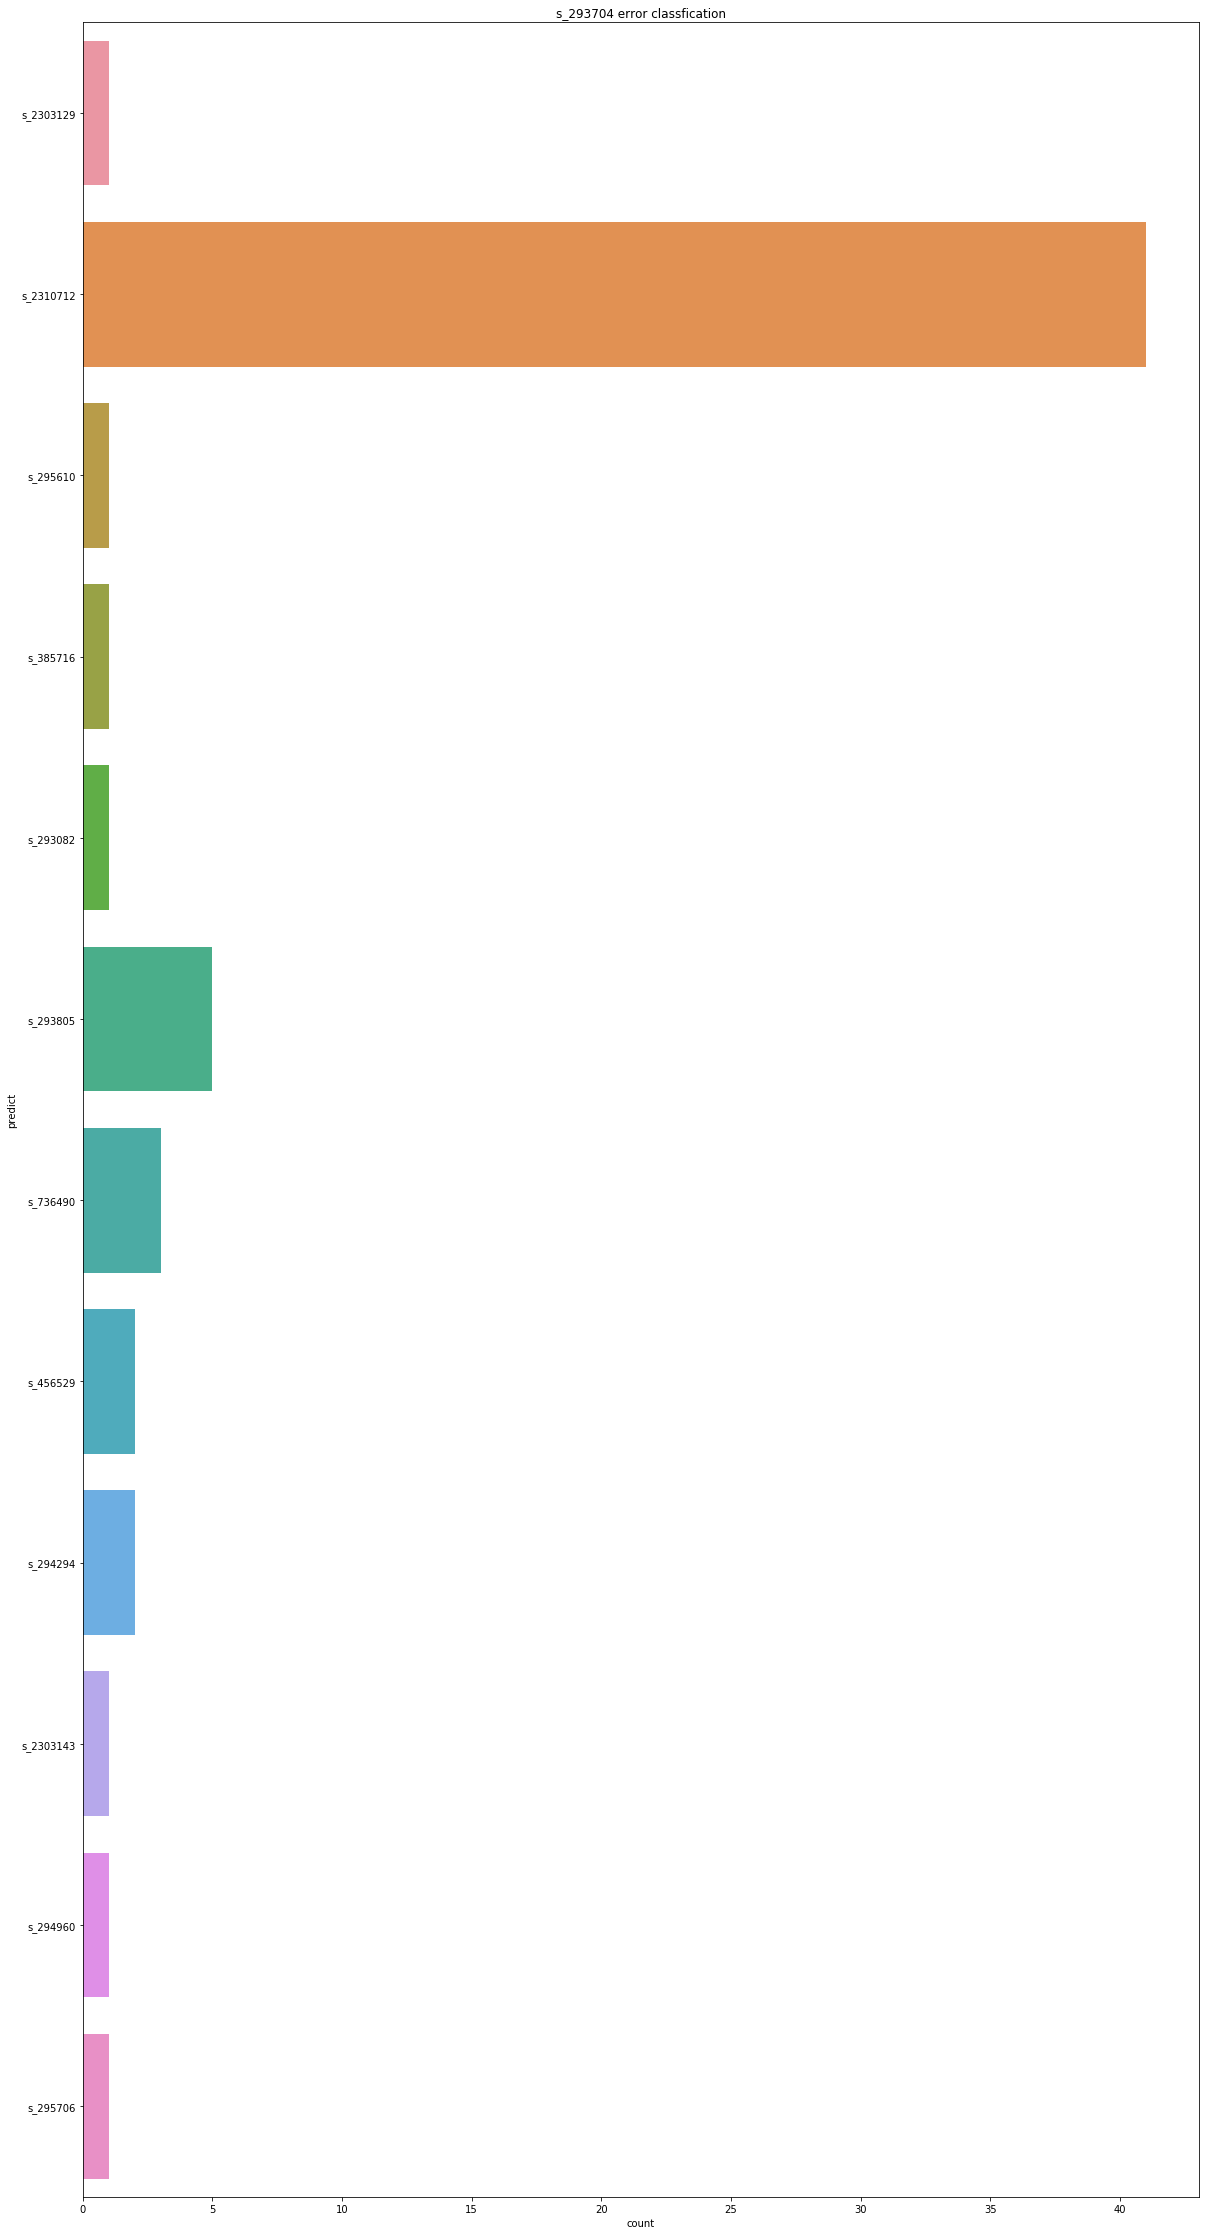

In [8]:
# s_293704 通畅被误分类为了
s_id = "s_293704"
_,ax = plt.subplots(1,1,figsize=(20,40))
ses.countplot(y = "predict",data=error[error.real==s_id],ax=ax)
plt.title(s_id + " error classfication")
plt.show()
# 很大程度被误分类为 s_2310712

In [ ]:
# explore s_2310712 和 s_293704

In [9]:
shop[shop.shop_id == "s_2310712"]

,shop_id,category_id,shop_longitude,shop_latitude,price,mall_id
5753,s_2310712,c_26,116.86325,40.326751,45,m_7168


In [10]:
shop[shop.shop_id == "s_293704"]

,shop_id,category_id,shop_longitude,shop_latitude,price,mall_id
1551,s_293704,c_30,116.863492,40.327224,47,m_7168


In [11]:
part_error = error[(error.real=="s_293704") | (error.real=="s_2310712")]

In [12]:
part_error_valid = valid.iloc[part_error.index]
preprocess_basic_time(part_error_valid)

/usr/lib64/python2.7/site-packages/pandas/core/indexing.py:296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/lib64/python2.7/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,user_id,shop_id,time_stamp,longitude,latitude,wifi_infos,category_id,shop_longitude,shop_latitude,price,mall_id,i_loc,dt,weekday,hour,is_weekend
1755,u_285640,s_293704,2017-08-30 11:50,116.863042,40.327349,b_57104369|-63|false;b_40418853|-62|false;b_55...,c_30,116.863492,40.327224,47,m_7168,79,2017-08-30 11:50:00,2,11,0
7205,u_1191918,s_2310712,2017-08-30 14:40,116.863038,40.327043,b_13344593|-74|false;b_55640284|-62|false;b_55...,c_26,116.863250,40.326751,45,m_7168,288,2017-08-30 14:40:00,2,14,0
8270,u_1358786,s_2310712,2017-08-30 12:50,116.863047,40.327072,b_62782|-85|false;b_62472|-87|false;b_4640639|...,c_26,116.863250,40.326751,45,m_7168,311,2017-08-30 12:50:00,2,12,0
10861,u_1804118,s_2310712,2017-08-25 12:30,116.863042,40.327065,b_33310185|-67|false;b_29177557|-69|false;b_32...,c_26,116.863250,40.326751,45,m_7168,381,2017-08-25 12:30:00,4,12,0
16047,u_2762200,s_2310712,2017-08-29 18:10,116.863088,40.327270,b_62472|-88|false;b_62803|-55|false;b_40418853...,c_26,116.863250,40.326751,45,m_7168,550,2017-08-29 18:10:00,1,18,0
22017,u_3925242,s_293704,2017-08-31 11:00,116.863041,40.327054,b_62780|-75|false;b_32788960|-76|false;b_62755...,c_30,116.863492,40.327224,47,m_7168,739,2017-08-31 11:00:00,3,11,0
22444,u_4014073,s_2310712,2017-08-26 12:30,116.863110,40.326879,b_62802|-53|false;b_40418853|-54|false;b_55640...,c_26,116.863250,40.326751,45,m_7168,752,2017-08-26 12:30:00,5,12,1
25638,u_4698381,s_2310712,2017-08-25 18:40,116.863205,40.327179,b_57104369|-57|false;b_4640641|-86|false;b_286...,c_26,116.863250,40.326751,45,m_7168,843,2017-08-25 18:40:00,4,18,0
30777,u_6193139,s_2310712,2017-08-28 20:00,116.862883,40.327350,b_22663370|-71|false;b_57104369|-47|false;b_38...,c_26,116.863250,40.326751,45,m_7168,948,2017-08-28 20:00:00,0,20,0
32945,u_6772208,s_2310712,2017-08-29 12:50,116.863220,40.326977,b_5148346|-66|false;b_41615054|-44|false;b_416...,c_26,116.863250,40.326751,45,m_7168,992,2017-08-29 12:50:00,1,12,0


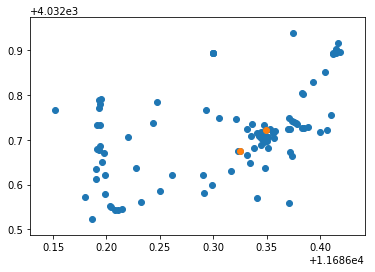

In [13]:
plt.scatter(shop.shop_longitude * 100,shop.shop_latitude* 100)
plt.scatter(shop[(shop.shop_id=="s_293704") | (shop.shop_id=="s_2310712")].shop_longitude * 100,
            shop[(shop.shop_id=="s_293704") | (shop.shop_id=="s_2310712")].shop_latitude * 100)
plt.show()

In [19]:
s_293704_train = train_all[train_all.shop_id.isin(["s_293704"])]
s_2310712_train = train_all[train_all.shop_id.isin(["s_2310712"])]

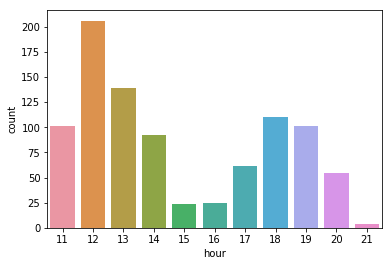

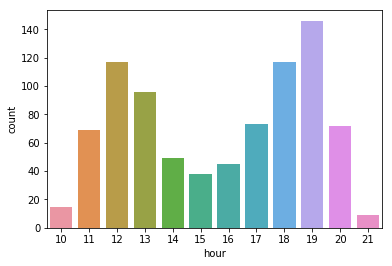

In [20]:
ses.countplot(x = "hour", data=s_293704_in_train_all)
plt.show()
ses.countplot(x = "hour", data=s_2310712_in_train_all)
plt.show()

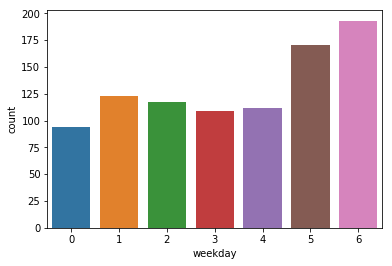

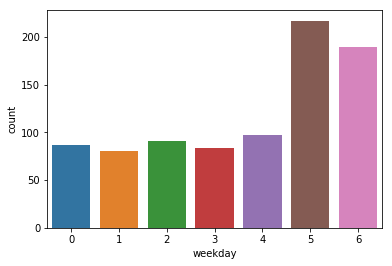

In [22]:
ses.countplot(x = "weekday", data=s_293704_in_train_all)
plt.show()
ses.countplot(x = "weekday", data=s_2310712_in_train_all)
plt.show()

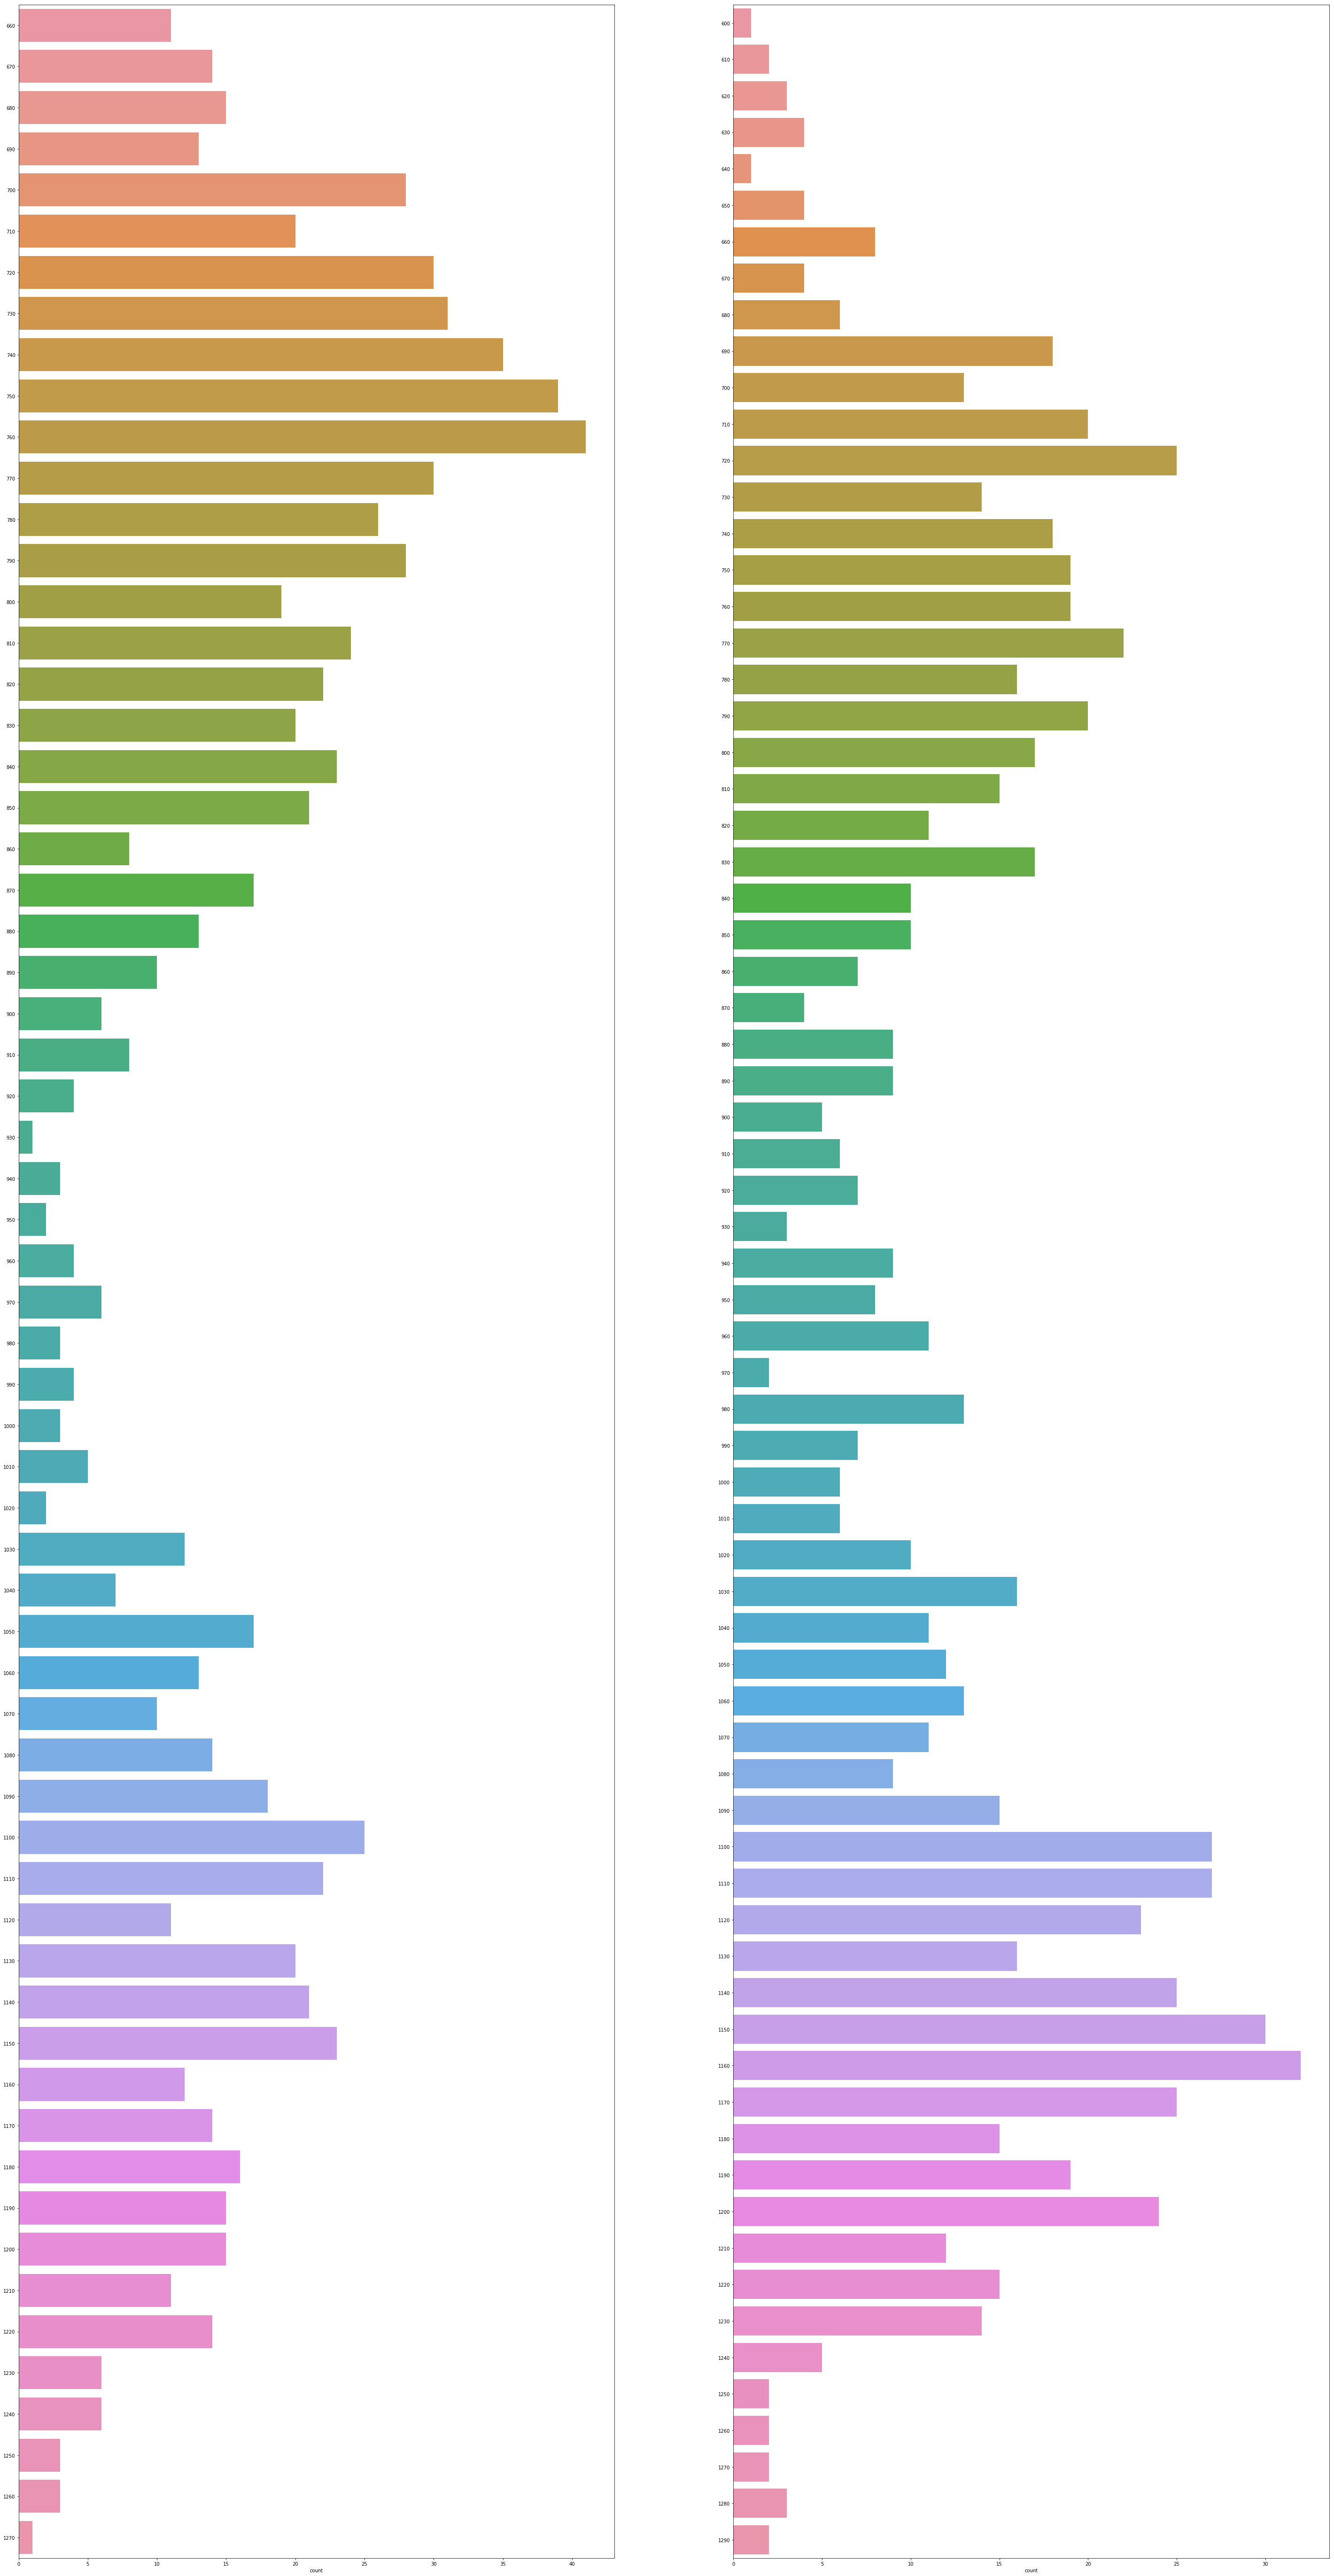

In [27]:
f,ax = plt.subplots(1,2,figsize=(50,100))
ses.countplot(y = s_293704_in_train_all.hour * 60 + s_293704_in_train_all.dt.dt.minute,ax=ax[0])
ses.countplot(y = s_2310712_in_train_all.hour * 60 + s_2310712_in_train_all.dt.dt.minute,ax=ax[1])
plt.show()

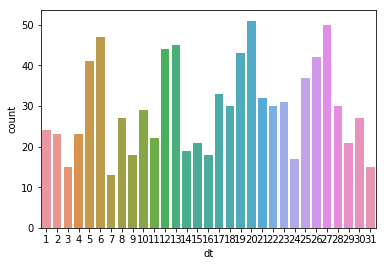

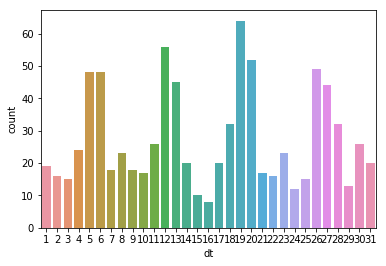

In [66]:
ses.countplot(s_293704_train.dt.dt.day)
plt.show()
ses.countplot(s_2310712_train.dt.dt.day)
plt.show()

In [28]:
def get_all_wifi2(x, all_wifis, threshold = -115):
    for _x in x[1]:
        if _x[1] > threshold:
            all_wifis.append(_x[0])
    for _x in x[2]:
        if _x[1] > threshold:
            all_wifis.append(_x[0])
        
def get_sorted_wifi2(datas, threshold = -115):
    all_wifis = []
    for _data in datas:
        _data.basic_wifi_info.map(lambda x: get_all_wifi2(x, all_wifis,threshold))
    c = Counter(all_wifis)
    sorted_wifi = sorted(c.items(), key=lambda x: -x[1])
    return sorted_wifi

In [32]:
preprocess_basic_wifi(s_293704_train)
preprocess_basic_wifi(s_2310712_train)
print "s_2310712", s_2310712_train.shape
print "s_293704", s_293704_train.shape

s_2310712 (846, 22)
s_293704 (918, 22)


In [33]:
s_2310712_train_wifi = get_sorted_wifi2([s_2310712_train])

In [34]:
s_293704_train_wifi = get_sorted_wifi2([s_293704_train])

In [35]:
s_2310712_and_s_293704_train = train[train.shop_id.isin(["s_2310712","s_293704"])]
s_2310712_and_s_293704_valid = valid[valid.shop_id.isin(["s_2310712","s_293704"])]

In [36]:
df, (train_index, train_use_wifi, train_matrix), (test_index, test_use_wifi, test_matrix) = get_wifi_cache2(mall_id)

In [38]:
train_x = train_matrix[np.in1d(train_index,s_2310712_and_s_293704_train.index)]
train_y = train_all.shop_id.values[np.in1d(train_index,s_2310712_and_s_293704_train.index)]

In [39]:
valid_x = train_matrix[np.in1d(train_index,s_2310712_and_s_293704_valid.index)]
valid_y = train_all.shop_id.values[np.in1d(train_index,s_2310712_and_s_293704_valid.index)]

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
s_2310712 = s_2310712_and_s_293704_train[s_2310712_and_s_293704_train.shop_id.isin(["s_2310712"])]
s_293704 = s_2310712_and_s_293704_train[s_2310712_and_s_293704_train.shop_id.isin(["s_293704"])]
preprocess_basic_wifi(s_2310712)
preprocess_basic_wifi(s_293704)

,user_id,shop_id,time_stamp,longitude,latitude,wifi_infos,category_id,shop_longitude,shop_latitude,price,...,weekday,hour,is_weekend,i_loc,basic_wifi_info,wifi_size,use_wifi_size,no_use_wifi_size,use_wifi_freq,no_use_wifi_freq
959,u_160052,s_293704,2017-08-06 12:50,116.863038,40.327043,b_62756|-81|false;b_3103134|-63|false;b_62803|...,c_30,116.863492,40.327224,47,...,6,12,1,46,"(10, [], [(b_62756, -81), (b_3103134, -63), (b...",10,0,10,0.0,1.0
1303,u_216163,s_293704,2017-08-04 12:00,116.863045,40.327348,b_62442|-73|false;b_4640672|-86|false;b_291775...,c_30,116.863492,40.327224,47,...,4,12,0,60,"(10, [], [(b_62442, -73), (b_4640672, -86), (b...",10,0,10,0.0,1.0
1754,u_285640,s_293704,2017-08-17 12:00,116.863388,40.327621,b_29177557|-84|false;b_62672|-82|false;b_41615...,c_30,116.863492,40.327224,47,...,3,12,0,78,"(10, [], [(b_29177557, -84), (b_62672, -82), (...",10,0,10,0.0,1.0
1756,u_285640,s_293704,2017-08-21 14:00,116.863402,40.327652,b_40418853|-59|false;b_57104369|-66|false;b_46...,c_30,116.863492,40.327224,47,...,0,14,0,80,"(10, [], [(b_40418853, -59), (b_57104369, -66)...",10,0,10,0.0,1.0
2221,u_358247,s_293704,2017-08-20 18:50,116.863054,40.327325,b_55640284|-62|false;b_29177557|-69|false;b_41...,c_30,116.863492,40.327224,47,...,6,18,1,97,"(10, [], [(b_55640284, -62), (b_29177557, -69)...",10,0,10,0.0,1.0
2415,u_390540,s_293704,2017-08-05 15:10,116.863033,40.327037,b_48881400|-52|false;b_32788960|-64|false;b_57...,c_30,116.863492,40.327224,47,...,5,15,1,101,"(10, [], [(b_48881400, -52), (b_32788960, -64)...",10,0,10,0.0,1.0
4176,u_676139,s_293704,2017-08-12 12:20,116.863063,40.327446,b_4640638|-74|false;b_62756|-77|false;b_62803|...,c_30,116.863492,40.327224,47,...,5,12,1,163,"(10, [], [(b_4640638, -74), (b_62756, -77), (b...",10,0,10,0.0,1.0
4552,u_741273,s_293704,2017-08-01 18:20,116.863035,40.327036,b_13344593|-67|false;b_57104369|-52|false;b_10...,c_30,116.863492,40.327224,47,...,1,18,0,179,"(10, [], [(b_13344593, -67), (b_57104369, -52)...",10,0,10,0.0,1.0
5003,u_818061,s_293704,2017-08-23 18:50,116.863207,40.327177,b_29871522|-77|false;b_62780|-88|false;b_40418...,c_30,116.863492,40.327224,47,...,2,18,0,198,"(10, [], [(b_29871522, -77), (b_62780, -88), (...",10,0,10,0.0,1.0
5308,u_869462,s_293704,2017-08-24 19:00,116.863045,40.327347,b_28668877|-80|false;b_28657579|-61|false;b_19...,c_30,116.863492,40.327224,47,...,3,19,0,209,"(10, [], [(b_28668877, -80), (b_28657579, -61)...",10,0,10,0.0,1.0


In [45]:
get_sorted_wifi2([s_293704])

[('b_57104369', 602),
 ('b_55640284', 432),
 ('b_62802', 359),
 ('b_4640641', 355),
 ('b_62803', 320),
 ('b_29177557', 297),
 ('b_41615054', 294),
 ('b_40418853', 252),
 ('b_62756', 238),
 ('b_13344593', 196),
 ('b_32126069', 178),
 ('b_4640639', 174),
 ('b_4640616', 162),
 ('b_62443', 140),
 ('b_32788960', 134),
 ('b_4640672', 123),
 ('b_4640640', 117),
 ('b_5150807', 114),
 ('b_33310185', 113),
 ('b_6414712', 94),
 ('b_62755', 88),
 ('b_30783666', 84),
 ('b_28668877', 74),
 ('b_62780', 71),
 ('b_62782', 71),
 ('b_29177575', 60),
 ('b_1076541', 58),
 ('b_4640614', 55),
 ('b_4640615', 47),
 ('b_4640661', 43),
 ('b_35821406', 43),
 ('b_5148346', 40),
 ('b_26382620', 40),
 ('b_26382621', 39),
 ('b_62442', 37),
 ('b_55027699', 36),
 ('b_30783667', 36),
 ('b_4196439', 35),
 ('b_4640670', 34),
 ('b_62617', 33),
 ('b_26350605', 32),
 ('b_62673', 27),
 ('b_23648483', 21),
 ('b_1076539', 21),
 ('b_1076542', 19),
 ('b_4640671', 19),
 ('b_62672', 18),
 ('b_52574362', 16),
 ('b_26933621', 15),
 (

In [48]:
get_sorted_wifi2([s_2310712])

[('b_57104369', 549),
 ('b_55640284', 355),
 ('b_4640641', 336),
 ('b_62803', 327),
 ('b_62802', 302),
 ('b_62756', 242),
 ('b_41615054', 233),
 ('b_40418853', 202),
 ('b_32126069', 195),
 ('b_29177557', 174),
 ('b_4640639', 165),
 ('b_32788960', 156),
 ('b_4640616', 146),
 ('b_33310185', 141),
 ('b_13344593', 134),
 ('b_4640640', 129),
 ('b_5150807', 127),
 ('b_62443', 127),
 ('b_4640672', 118),
 ('b_6414712', 105),
 ('b_62755', 99),
 ('b_35821406', 81),
 ('b_30783666', 78),
 ('b_55027699', 77),
 ('b_62782', 74),
 ('b_28668877', 72),
 ('b_62780', 61),
 ('b_4640614', 53),
 ('b_26350605', 48),
 ('b_5148346', 46),
 ('b_4640615', 45),
 ('b_1076541', 40),
 ('b_4640671', 40),
 ('b_4640670', 38),
 ('b_4196439', 36),
 ('b_29650327', 31),
 ('b_26382620', 28),
 ('b_30783667', 28),
 ('b_26382621', 26),
 ('b_29177575', 25),
 ('b_62617', 22),
 ('b_4640661', 19),
 ('b_62672', 19),
 ('b_1076539', 19),
 ('b_62673', 18),
 ('b_62711', 17),
 ('b_29651260', 16),
 ('b_52574362', 16),
 ('b_26382619', 16),


In [50]:
wifis = get_sorted_wifi2([s_2310712,s_293704])

In [51]:
choose_wifi = wifis[:sp]

In [ ]:
sp = 400
choose_wifi = wifis[:sp]
c = choose_wifi
_trainx = train_x[:,df[df.wifi_name.isin(dict(c).keys())].wifi_rank.values]
_validx = valid_x[:,df[df.wifi_name.isin(dict(c).keys())].wifi_rank.values]
rf = RandomForestClassifier(n_estimators=1000,n_jobs=-1, random_state=2017 * 4)
rf.fit(_trainx,train_y)
p = rf.predict(_validx)


In [135]:
sp = 400
choose_wifi = wifis[:sp]

In [128]:
from sklearn.preprocessing import LabelEncoder
shopids = train.shop_id.unique()
train = train.reset_index()
valid = valid.reset_index()

In [114]:
train_x = train_matrix[_train_index]
valid_x = train_matrix[_valid_index]
train_y = y[_train_index]
valid_y = y[_valid_index]

(19826, 6699)

In [129]:
sid = shopids[0]
positive_iloc = train[train.shop_id == sid].index
negetive_iloc = train[train.shop_id != sid].index


In [132]:
from sklearn.multiclass import OneVsRestClassifier

In [134]:
ovr = OneVsRestClassifier(estimator=RandomForestClassifier(n_estimators=1000,n_jobs=-1),n_jobs=-1)

In [137]:
_train_x = train_x[:,df[df.wifi_name.isin(dict(c).keys())].wifi_rank.values]
_valid_x = valid_x[:,df[df.wifi_name.isin(dict(c).keys())].wifi_rank.values]
ovr.fit(_train_x,train_y)

Process PoolWorker-1:
Process PoolWorker-10:
Process PoolWorker-14:
Process PoolWorker-23:
Process PoolWorker-18:
Process PoolWorker-5:
Process PoolWorker-21:
Process PoolWorker-16:
Process PoolWorker-3:
Process PoolWorker-13:
Process PoolWorker-12:
Process PoolWorker-17:
Process PoolWorker-11:
Process PoolWorker-2:
Process PoolWorker-22:
Process PoolWorker-7:
Process PoolWorker-4:
Process PoolWorker-19:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last

    racquire()
    racquire()
  File "/usr/lib64/python2.7/site-packages/sklearn/externals/joblib/pool.py", line 360, in get
    racquire()
    return recv()
    racquire()
    racquire()
    racquire()
    racquire()
    racquire()
    racquire()
    racquire()
    racquire()
KeyboardInterrupt
KeyboardInterrupt
    racquire()
    racquire()
    racquire()
KeyboardInterrupt
    racquire()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
    racquire()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
Process PoolWorker-24:
Process PoolWorker-38:
Process PoolWorker-36:
Process PoolWorker-15:
Process PoolWorker-8:
Process PoolWorker-9:
Process PoolWorker-25:
Process PoolWorker-6:
Process PoolWorker-35:
Process PoolWorker-28:
Process PoolWorker-30:
Process PoolWorker-33:
Process PoolWorker-37:
Process PoolWorker-31:
Trac

KeyboardInterrupt: 

    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python2.7/multiprocessing/pool.py", line 102, in worker
  File "/usr/lib64/python2.7/site-packages/sklearn/externals/joblib/pool.py", line 360, in get
  File "/usr/lib64/python2.7/multiprocessing/pool.py", line 102, in worker
  File "/usr/lib64/python2.7/site-packages/sklearn/externals/joblib/pool.py", line 360, in get
    task = get()
    self._target(*self._args, **self._kwargs)
    racquire()
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/lib64/python2.7/multiprocessing/pool.py", line 102, in worker
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python2.7/multiprocessing/pool.py", line 102, in worker
  File "/usr/lib64/python2.7/multiprocessing/pool.py", line 102, in worker
    racquire()
  File "/usr/lib64/python2.7/site-packages/sklearn/externals/joblib/pool.py", line 

In [144]:
from sklearn.preprocessing import MultiLabelBinarizer,LabelBinarizer

In [157]:
lb = LabelBinarizer().fit(train_y)

In [158]:
train_binarizer_y = lb.transform(train_y)
valid_binarizer_y = lb.transform(valid_y)

In [164]:
for i in range(train_binarizer_y.shape[1]):
    rf = RandomForestClassifier(n_estimators=500,n_jobs=-1)
    rf.fit(_train_x, train_binarizer_y[:,i])
    p = rf.predict(_valid_x)
    print i,acc(p,valid_binarizer_y[:,i])

0 0.99632409251
1 0.999387348752
2 0.986368509726
3 0.993873487517
4 0.99632409251
5 0.99555827845
6 0.999387348752
7 0.999693674376
8 0.994945627202
9 1.0
10 0.999846837188
11 0.996017766886
12 0.998468371879
13 0.982692602236
14 0.97258385664
15 0.970745902895
16 0.981926788176
17 0.999846837188
18 0.975493950069
19 0.981314136928
20 0.999387348752
21 0.96967376321
22 0.997089906571
23 0.971205391331
24 0.971511716955
25 0.956808086996
26 0.981160974115
27 0.980701485679
28 0.971511716955
29 0.998468371879
30 0.992035533772
31 0.984224230357
32 0.995251952826
33 0.988819114719
34 0.982845765048
35 0.97258385664
36 0.994179813141
37 0.998621534691
38 0.997702557819
39 0.998008883443
40 0.97411548476
41 0.997855720631
42 0.995864604074
43 0.995405115638
44 0.997855720631
45 0.990963394088
46 0.997396232195
47 1.0
48 0.994332975953
49 0.997396232195
50 0.999081023128
51 0.996936743759
52 0.986062184102
53 0.996936743759
54 0.995405115638
55 0.989431765967
56 0.99555827845
57 0.991729208

In [196]:
i = 25
sp = 50
rf = RandomForestClassifier(n_estimators=500,n_jobs=-1)
rf.fit(train_x[:,np.array(range(train_x.shape[1]))[(train_x[(train_y==25)] > -115).sum(axis=0) > sp]], train_binarizer_y[:,i])
p = rf.predict(valid_x[:,np.array(range(train_x.shape[1]))[(train_x[(train_y==25)] > -115).sum(axis=0) > sp]])
print i,acc(p,valid_binarizer_y[:,i])

25 0.96002450605


In [211]:
ovr = OneVsRestClassifier(RandomForestClassifier(n_estimators=500,n_jobs=-1),n_jobs=-1)
ovr.fit(_train_x,train_y)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          n_jobs=-1)

In [212]:
ovr.predict(_valid_x)

array([21, 35, 24, ..., 15, 28, 90])

In [213]:
acc(Out[212],valid_y)

0.45902894777148107

In [215]:
all_rf = RandomForestClassifier(500,n_jobs=-1)
all_rf.fit(_train_x,train_y)
p = all_rf.predict(_valid_x)
acc(p,valid_y)

0.46163271557665797

In [195]:
i = 25
rf = RandomForestClassifier(n_estimators=500,n_jobs=-1)
rf.fit(_train_x, train_binarizer_y[:,i])
p = rf.predict(_valid_x)
print i,acc(p,valid_binarizer_y[:,i])

25 0.956042272936


In [8]:
predict

,predict,real
0,s_293805,s_293082
1,s_295706,s_293082
2,s_293082,s_293082
3,s_293704,s_736490
4,s_295706,s_295706
5,s_938918,s_938918
6,s_2527,s_2527
7,s_381583,s_381583
8,s_381725,s_381725
9,s_293805,s_293805


In [36]:
e = valid.iloc[predict[(predict.predict != predict.real)].index]

In [38]:
c =  valid.iloc[predict[(predict.predict == predict.real)].index]

In [59]:
c[c.user_id=="u_10477588"]

,user_id,shop_id,time_stamp,longitude,latitude,wifi_infos,category_id,shop_longitude,shop_latitude,price,mall_id,dt,weekday,hour,is_weekend,i_loc


In [50]:
e[e.user_id.isin(train.user_id.unique())].sort_values("user_id")

,user_id,shop_id,time_stamp,longitude,latitude,wifi_infos,category_id,shop_longitude,shop_latitude,price,mall_id,dt,weekday,hour,is_weekend,i_loc
234020,u_1007961,s_295706,2017-08-28 16:40,116.863003,40.326930,b_20237354|-64|false;b_62781|-77|false;b_35821...,c_13,116.863428,40.327109,50,m_7168,2017-08-28 16:40:00,0,16,0,5475
271387,u_10278109,s_456529,2017-08-30 12:00,116.862937,40.327468,b_29177575|-52|false;b_20505504|-57|false;b_62...,c_34,116.863478,40.327328,38,m_7168,2017-08-30 12:00:00,2,12,0,6379
271390,u_10278109,s_295610,2017-08-30 11:20,116.863002,40.326926,b_55276709|-75|false;b_40418853|-60|false;b_48...,c_28,116.863462,40.327005,51,m_7168,2017-08-30 11:20:00,2,11,0,6382
917504,u_1034817,s_293031,2017-08-28 12:50,116.863013,40.327423,b_4640670|-85|false;b_62756|-70|false;b_226155...,c_30,116.863452,40.327054,47,m_7168,2017-08-28 12:50:00,0,12,0,21269
498905,u_10437141,s_41948,2017-08-25 20:10,116.862684,40.325987,b_62705|-87|false;b_52574362|-59|false;b_44625...,c_34,116.861796,40.325728,38,m_7168,2017-08-25 20:10:00,4,20,0,11846
44763,u_10477588,s_2783591,2017-08-25 19:00,116.862897,40.327463,b_40418853|-73|false;b_32126069|-74|false;b_41...,c_26,116.863412,40.327142,46,m_7168,2017-08-25 19:00:00,4,19,0,1211
44765,u_10477588,s_2783591,2017-08-25 19:00,116.862954,40.327290,b_3612556|-79|false;b_35892599|-67|false;b_556...,c_26,116.863412,40.327142,46,m_7168,2017-08-25 19:00:00,4,19,0,1213
499725,u_10677735,s_295706,2017-08-29 19:20,116.863232,40.327050,b_57104369|-64|false;b_14680234|-59|false;b_20...,c_13,116.863428,40.327109,50,m_7168,2017-08-29 19:20:00,1,19,0,11856
727993,u_10718523,s_3994800,2017-08-29 12:50,116.863583,40.328033,b_17262172|-79|false;b_62780|-78|false;b_20552...,c_49,116.863234,40.326745,61,m_7168,2017-08-29 12:50:00,1,12,0,17064
275660,u_11282463,s_295192,2017-08-31 17:20,116.863343,40.327136,b_62803|-69|false;b_40418853|-59|false;b_27558...,c_30,116.863445,40.327177,47,m_7168,2017-08-31 17:20:00,3,17,0,6503


In [71]:
train[train.user_id=="u_917102"]

,user_id,shop_id,time_stamp,longitude,latitude,wifi_infos,category_id,shop_longitude,shop_latitude,price,mall_id,dt,weekday,hour,is_weekend,i_loc
5589,u_917102,s_293805,2017-08-22 13:00,116.863117,40.326692,b_4640614|-85|false;b_4640616|-84|false;b_4161...,c_30,116.863450,40.327036,49,m_7168,2017-08-22 13:00:00,1,13,0,219
5590,u_917102,s_295706,2017-08-23 16:30,116.863034,40.327041,b_35821406|-64|false;b_62780|-83|false;b_56583...,c_13,116.863428,40.327109,50,m_7168,2017-08-23 16:30:00,2,16,0,220
5591,u_917102,s_2783591,2017-08-22 12:40,116.863109,40.327095,b_62755|-67|false;b_3438143|-49|false;b_62782|...,c_26,116.863412,40.327142,46,m_7168,2017-08-22 12:40:00,1,12,0,221
5592,u_917102,s_295706,2017-08-22 12:40,116.863012,40.326961,b_30783666|-88|false;b_62443|-83|false;b_62756...,c_13,116.863428,40.327109,50,m_7168,2017-08-22 12:40:00,1,12,0,222
5594,u_917102,s_293704,2017-08-19 11:10,116.862840,40.327364,b_29177557|-59|false;b_55640284|-64|false;b_46...,c_30,116.863492,40.327224,47,m_7168,2017-08-19 11:10:00,5,11,1,224
5596,u_917102,s_293082,2017-08-22 12:40,116.863187,40.327183,b_4001121|-58|false;b_40418853|-70|false;b_571...,c_30,116.863439,40.327104,48,m_7168,2017-08-22 12:40:00,1,12,0,226
5597,u_917102,s_165228,2017-08-11 13:50,116.862632,40.327509,b_62556|-57|false;b_49747231|-66|false;b_29177...,c_29,116.863214,40.327470,52,m_7168,2017-08-11 13:50:00,4,13,0,227
5599,u_917102,s_293082,2017-08-10 10:30,116.863335,40.327295,b_32788960|-68|false;b_62803|-66|false;b_46406...,c_30,116.863439,40.327104,48,m_7168,2017-08-10 10:30:00,3,10,0,229
5600,u_917102,s_293082,2017-08-19 11:10,116.863052,40.327333,b_35821406|-76|false;b_32788960|-63|false;b_62...,c_30,116.863439,40.327104,48,m_7168,2017-08-19 11:10:00,5,11,1,230


In [70]:
train.sort_values(["user_id","time_stamp"])

,user_id,shop_id,time_stamp,longitude,latitude,wifi_infos,category_id,shop_longitude,shop_latitude,price,mall_id,dt,weekday,hour,is_weekend,i_loc
953344,u_10000813,s_301215,2017-08-06 17:00,116.863765,40.328122,b_459098|-46|false;b_62429|-84|false;b_62538|-...,c_29,116.863934,40.328298,47,m_7168,2017-08-06 17:00:00,6,17,1,22168
270605,u_10014313,s_293805,2017-08-19 12:30,116.863001,40.326925,b_1137147|-85|false;b_62756|-62|false;b_505980...,c_30,116.863450,40.327036,49,m_7168,2017-08-19 12:30:00,5,12,1,6370
953409,u_10021358,s_42761,2017-08-08 17:30,116.863004,40.326932,b_33310185|-62|false;b_1134020|-43|false;b_204...,c_11,116.863383,40.326812,65,m_7168,2017-08-08 17:30:00,1,17,0,22169
233988,u_1002210,s_385716,2017-08-11 19:30,116.862940,40.327465,b_55640284|-61|false;b_29177575|-46|false;b_51...,c_30,116.863360,40.327361,51,m_7168,2017-08-11 19:30:00,4,19,0,5473
6108,u_1002642,s_2303143,2017-08-05 14:00,116.862965,40.326790,b_57104369|-71|false;b_62755|-74|false;b_52574...,c_25,116.863477,40.326945,46,m_7168,2017-08-05 14:00:00,5,14,1,253
6109,u_1002642,s_2310712,2017-08-05 14:10,116.862919,40.327333,b_32126069|-78|false;b_7425571|-64|false;b_464...,c_26,116.863250,40.326751,45,m_7168,2017-08-05 14:10:00,5,14,1,254
953440,u_10029553,s_456529,2017-08-09 12:10,116.862668,40.327418,b_21978250|-62|false;b_4640641|-87|false;b_464...,c_34,116.863478,40.327328,38,m_7168,2017-08-09 12:10:00,2,12,0,22170
270667,u_10034451,s_5014,2017-08-21 20:50,116.862948,40.326443,b_33964387|-53|false;b_1110420|-41|false;b_419...,c_43,116.863320,40.327233,65,m_7168,2017-08-21 20:50:00,0,20,0,6371
43506,u_10047742,s_3741710,2017-08-19 11:20,116.861849,40.327439,b_30230768|-89|false;b_62423|-88|false;b_30230...,c_34,116.861934,40.327878,41,m_7168,2017-08-19 11:20:00,5,11,1,1195
43507,u_10047742,s_381583,2017-08-19 19:10,116.862999,40.325683,b_26362563|-81|false;b_26364384|-83|false;b_26...,c_50,116.862992,40.325980,55,m_7168,2017-08-19 19:10:00,5,19,1,1196
